In [1]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [36]:
gas = Table().read_table('gas.csv')

In [3]:
advances = gas.where('Country', 'Advanced Economies').where('Gas_Type', 'Greenhouse gas')
developing = gas.where('Country', 'Emerging and Developing Economies').where('Gas_Type', 'Greenhouse gas')

In [59]:
total_emission = []
advanced_total = []
developing_total = []

for i in np.arange(13, 25, 1):
    total_emission.append(gas.where('Country', 'World').where('Gas_Type', 'Greenhouse gas').where('Industry', 'Total Industry and Households').column(i)[0])
    advanced_total.append(advances.where('Gas_Type', 'Greenhouse gas').where('Industry', 'Total Industry and Households').column(i)[0])
    developing_total.append(developing.where('Gas_Type', 'Greenhouse gas').where('Industry', 'Total Industry and Households').column(i)[0])

In [50]:
years = np.arange(2010, 2022, 1)
advance_emissions_elec = []
advance_emissions_manu = []
advance_emissions_house = []
advance_emissions_trans = []
developing_emissions_elec = []
developing_emissions_manu = []
developing_emissions_house = []
developing_emissions_trans = []

for i in np.arange(13, 25, 1):
  advance_emissions_elec.append(advances.where('Industry', 'Agriculture, Forestry and Fishing').column(i)[0])
  advance_emissions_manu.append(advances.where('Industry', 'Manufacturing').column(i)[0])
  advance_emissions_house.append(advances.where('Industry', 'Total Households').column(i)[0])
  advance_emissions_trans.append(advances.where('Industry', 'Transportation and Storage').column(i)[0])
  developing_emissions_elec.append(developing.where('Industry', 'Agriculture, Forestry and Fishing').column(i)[0])
  developing_emissions_manu.append(developing.where('Industry', 'Manufacturing').column(i)[0])
  developing_emissions_house.append(developing.where('Industry', 'Total Households').column(i)[0])
  developing_emissions_trans.append(developing.where('Industry', 'Transportation and Storage').column(i)[0])

In [51]:
rate = 0.015
developing_pop = []
advanced_pop = []
for i in np.arange(2010, 2022, 1):
  developing_pop.append(6690000000 / ((1 + rate) ** (2021 - i)))
  advanced_pop.append((7900000000 - 6690000000) / ((1 + rate) ** (2021 - i)))

In [52]:
advance_emissions_elec = np.divide(advance_emissions_elec, advanced_pop)
advance_emissions_manu = np.divide(advance_emissions_manu, advanced_pop)
advance_emissions_house = np.divide(advance_emissions_house, advanced_pop)
advance_emissions_trans = np.divide(advance_emissions_trans, advanced_pop)
developing_emissions_elec = np.divide(developing_emissions_elec, developing_pop)
developing_emissions_manu = np.divide(developing_emissions_manu, developing_pop)
developing_emissions_house = np.divide(developing_emissions_house, developing_pop)
developing_emissions_trans = np.divide(developing_emissions_trans, developing_pop)

In [60]:
catogrized = Table().with_columns(
    'Year', years,
    'Advanced_elec', advance_emissions_elec,
    'Advanced_manu', advance_emissions_manu,
    'Advanced_house', advance_emissions_house,
    'Advanced_trans', advance_emissions_trans,
    'Developing_elec', developing_emissions_elec,
    'Developing_manu', developing_emissions_manu,
    'Developing_house', developing_emissions_house,
    'Developing_trans', developing_emissions_trans,
    'Advanced total', advanced_total,
    'Developing total', developing_total,
    'Total Emission', total_emission
)

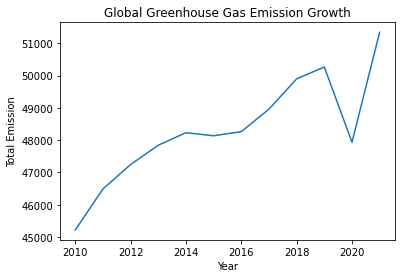

In [64]:
plt.plot(catogrized.column('Year'), catogrized.column('Total Emission'))
plt.xlabel('Year')
plt.ylabel('Total Emission')
plt.title('Global Greenhouse Gas Emission Growth')
plt.show()

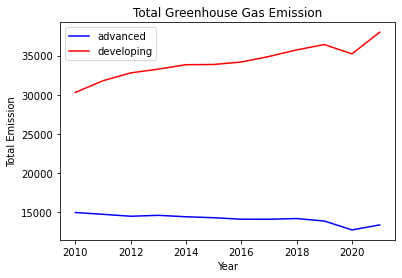

In [62]:
plt.plot(catogrized.column('Year'), catogrized.column('Advanced total'), color='blue')
plt.plot(catogrized.column('Year'), catogrized.column('Developing total'), color='red')
plt.xlabel('Year')
plt.ylabel('Total Emission')
plt.title('Total Greenhouse Gas Emission')
plt.legend(['advanced', 'developing'])
plt.show()

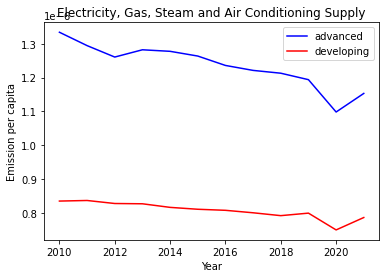

In [22]:
plt.plot(catogrized.column('Year'), catogrized.column('Advanced_elec'), color='blue')
plt.plot(catogrized.column('Year'), catogrized.column('Developing_elec'), color='red')
plt.xlabel('Year')
plt.ylabel('Emission per capita')
plt.title('Electricity, Gas, Steam and Air Conditioning Supply')
plt.legend(['advanced', 'developing'])
plt.show()

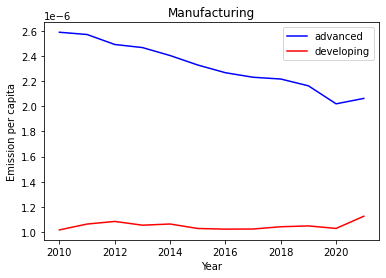

In [20]:
plt.plot(catogrized.column('Year'), catogrized.column('Advanced_manu'), color='blue')
plt.plot(catogrized.column('Year'), catogrized.column('Developing_manu'), color='red')
plt.xlabel('Year')
plt.ylabel('Emission per capita')
plt.title('Manufacturing')
plt.legend(['advanced', 'developing'])
plt.show()

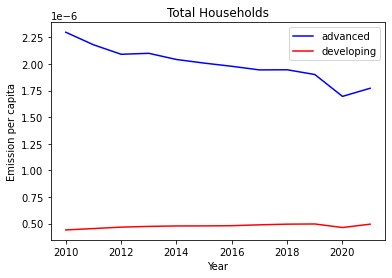

In [23]:
plt.plot(catogrized.column('Year'), catogrized.column('Advanced_house'), color='blue')
plt.plot(catogrized.column('Year'), catogrized.column('Developing_house'), color='red')
plt.xlabel('Year')
plt.ylabel('Emission per capita')
plt.title('Total Households')
plt.legend(['advanced', 'developing'])
plt.show()

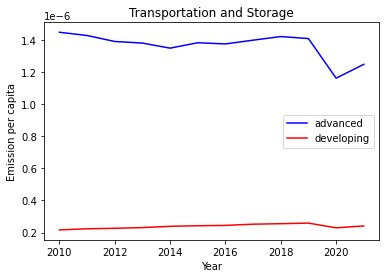

In [24]:
plt.plot(catogrized.column('Year'), catogrized.column('Advanced_trans'), color='blue')
plt.plot(catogrized.column('Year'), catogrized.column('Developing_trans'), color='red')
plt.xlabel('Year')
plt.ylabel('Emission per capita')
plt.title('Transportation and Storage')
plt.legend(['advanced', 'developing'])
plt.show()